In [62]:
%pip install seaborn
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
dataset = pd.read_csv("./geophone/geophone-sensor-data.csv")

dataset_sorted = dataset.sort_values(by=["name", "timestamp"], ascending=[True, True])

Text(0.5, 0.98, 'Distribution of Mean')

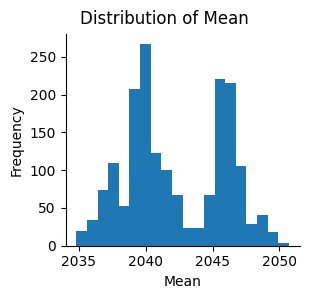

In [64]:
og = sns.FacetGrid(dataset_sorted)
og.map(plt.hist, 'mean', bins=20)

og.set_axis_labels("Mean", "Frequency")
og.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
og.figure.suptitle("Distribution of Mean")

In [65]:
train, test = train_test_split(dataset_sorted, test_size=0.5, random_state=42, shuffle=True)
print(train.head())
print('_'*40)
print(test.head())

     timestamp         mean   top_3_mean   min   max   std_dev  median  \
1710  21:12:44  2037.283333  2041.000000  2033  2041  1.858419  2038.0   
874   02:42:25  2039.936000  2071.333333  2007  2075  5.534851  2040.0   
1252  03:46:51  2042.155333  2048.000000  2037  2048  2.716715  2042.0   
1345  02:47:35  2041.374000  2047.000000  2035  2047  3.268964  2043.0   
873   02:42:22  2039.518667  2055.000000  2018  2055  3.941445  2041.0   

          q1      q3  skewness  dominant_freq        energy activity    name  
1710  2036.0  2039.0 -0.423633          600.0  1.930823e+09  waiting    Emir  
874   2035.0  2045.0 -0.127944          600.0  1.947087e+09  running  Furkan  
1252  2040.0  2045.0  0.110133          300.0  1.960641e+09  waiting   Yusuf  
1345  2039.0  2044.0 -0.585361          300.0  1.955860e+09  waiting    Enes  
873   2035.0  2042.0 -0.438889          300.0  1.944511e+09  running  Furkan  
________________________________________
     timestamp         mean   top_3_mean

Text(0.5, 0.98, 'Distribution of Training Mean')

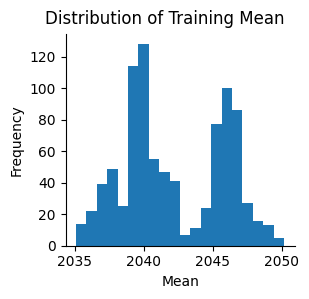

In [66]:
train_g = sns.FacetGrid(train)
train_g.map(plt.hist, 'mean', bins=20)
train_g.set_axis_labels("Mean", "Frequency")
train_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
train_g.figure.suptitle("Distribution of Training Mean")


Text(0.5, 0.98, 'Distribution of Test Mean')

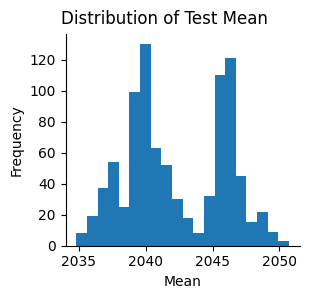

In [67]:
test_g = sns.FacetGrid(test)
test_g.map(plt.hist, 'mean', bins=20)

test_g.set_axis_labels("Mean", "Frequency")
test_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
test_g.figure.suptitle("Distribution of Test Mean")


Cannot use person as a afeature due to below inconsistencies. We have to look at the data holistically. 

Test if there are outliers or noise in the data 

Binning and standardizing

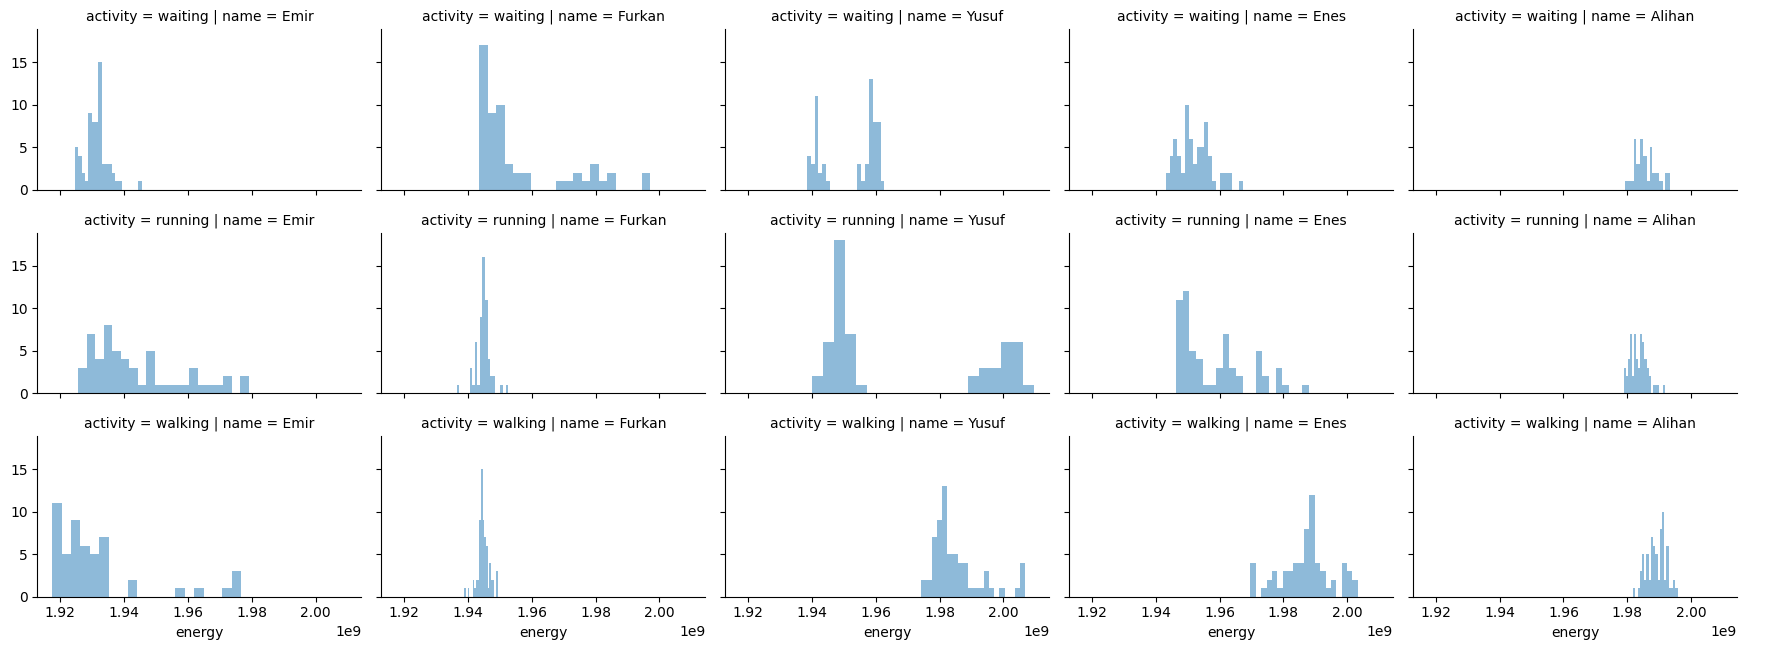

In [68]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.hist, 'energy', alpha=.5, bins=20)
grid.add_legend();


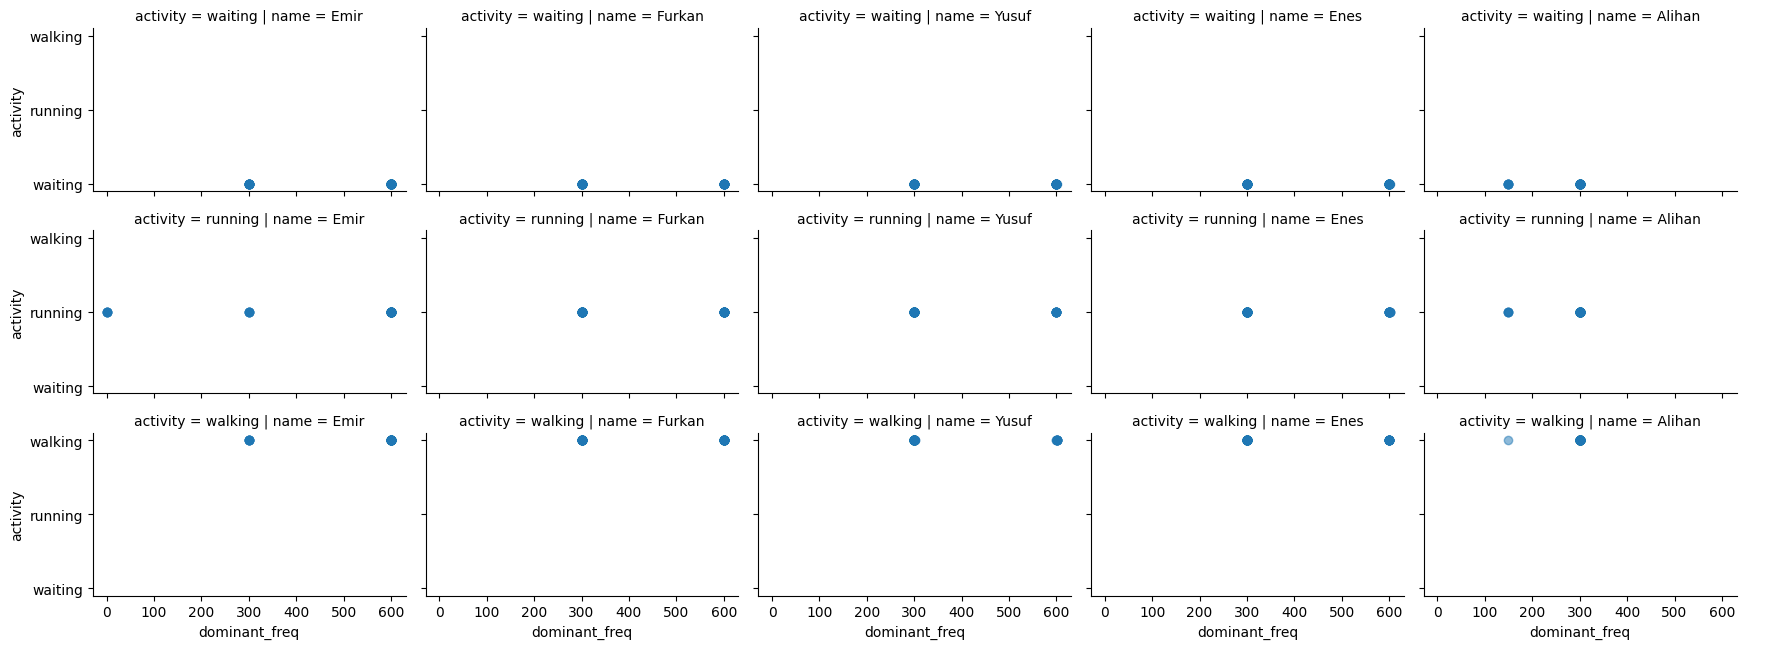

In [69]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'dominant_freq', 'activity', alpha=.5)
grid.add_legend();


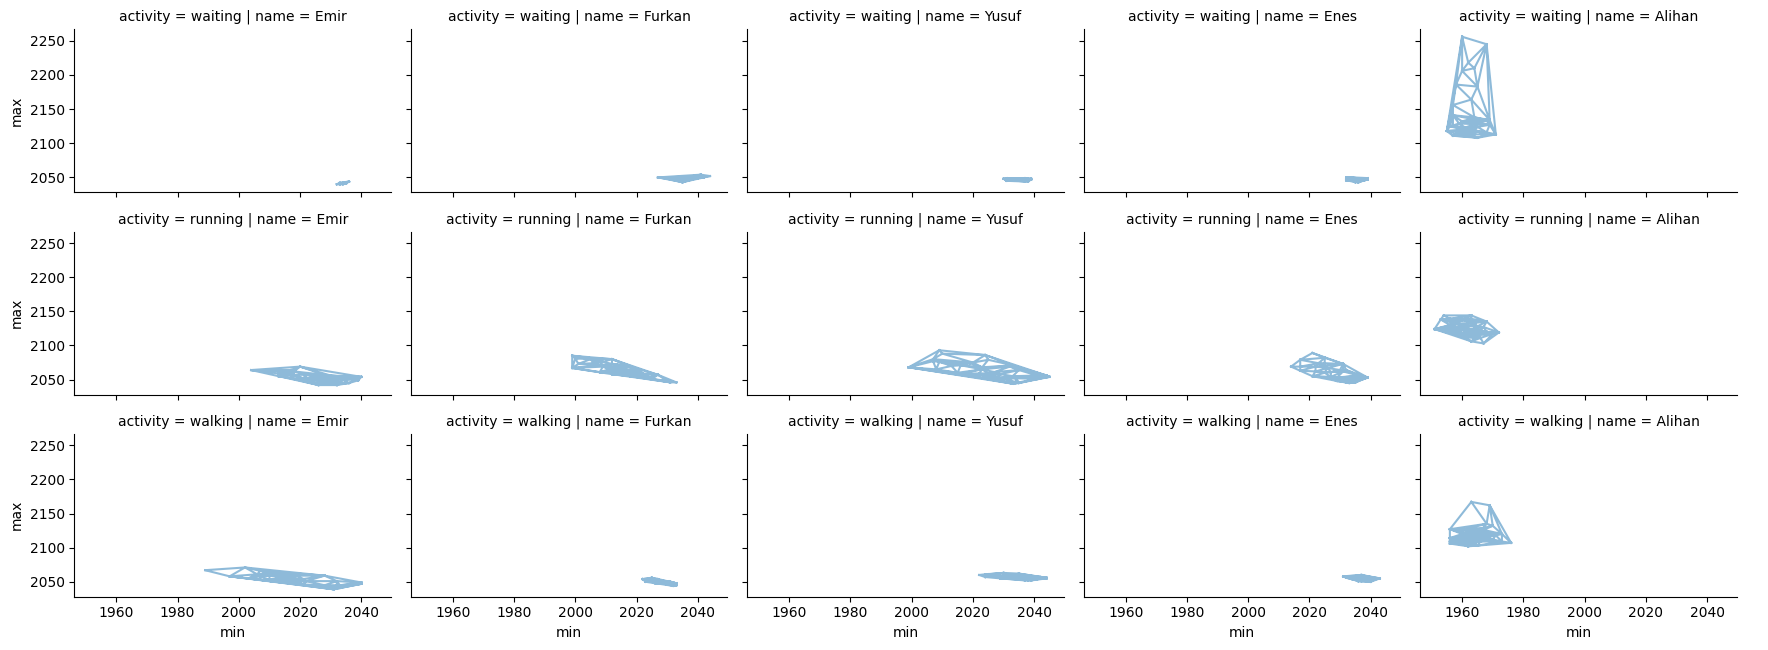

In [70]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.triplot, 'min', 'max', alpha=.5)
grid.add_legend();


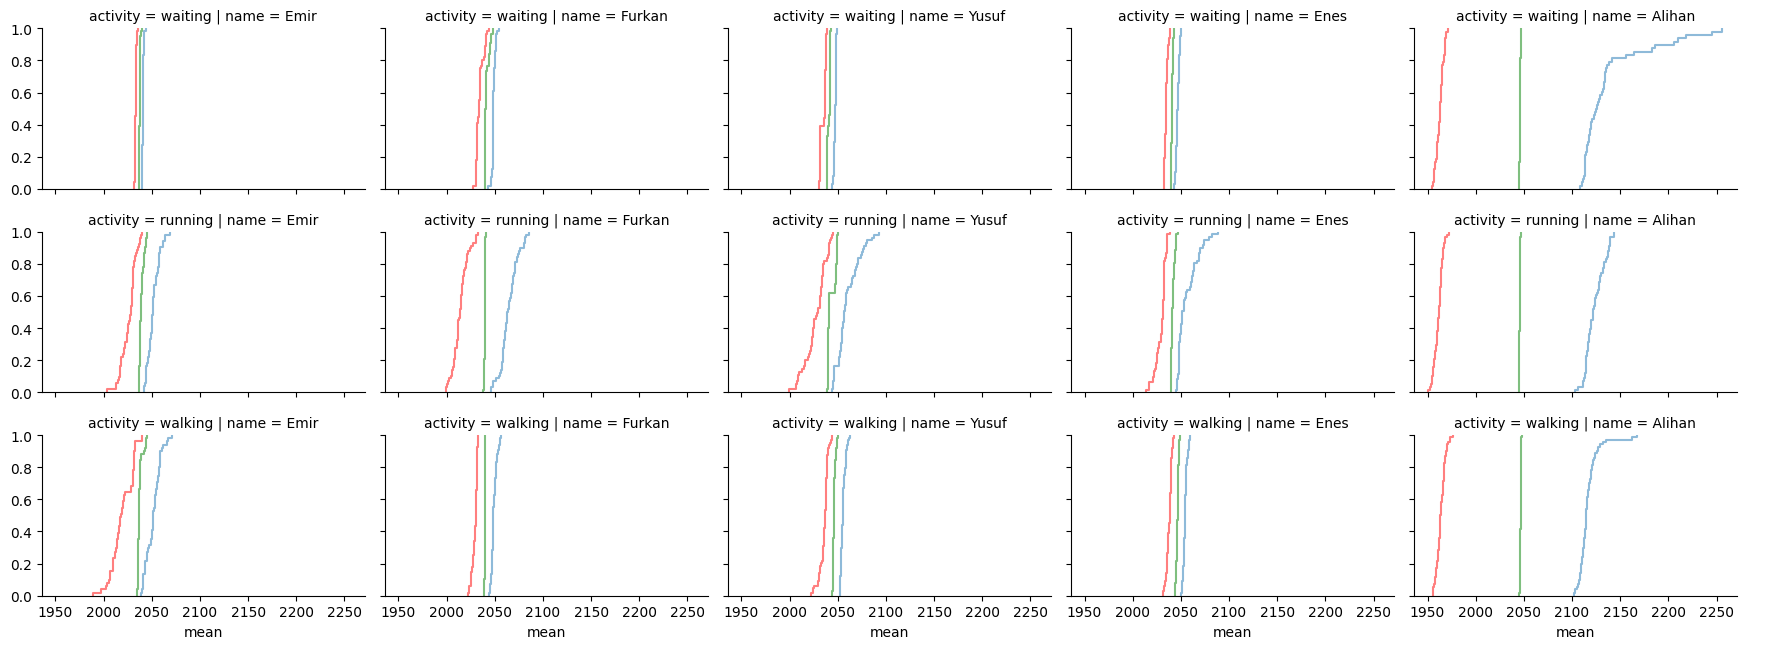

In [71]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.ecdf, 'max', alpha=.5)
grid.map(plt.ecdf, 'min', alpha=.5, color='red')
grid.map(plt.ecdf, 'mean', alpha=.5, color='green')
grid.add_legend();


/tmp/ipykernel_555/4119187136.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['timestamp'] = pd.to_datetime(train['timestamp'])


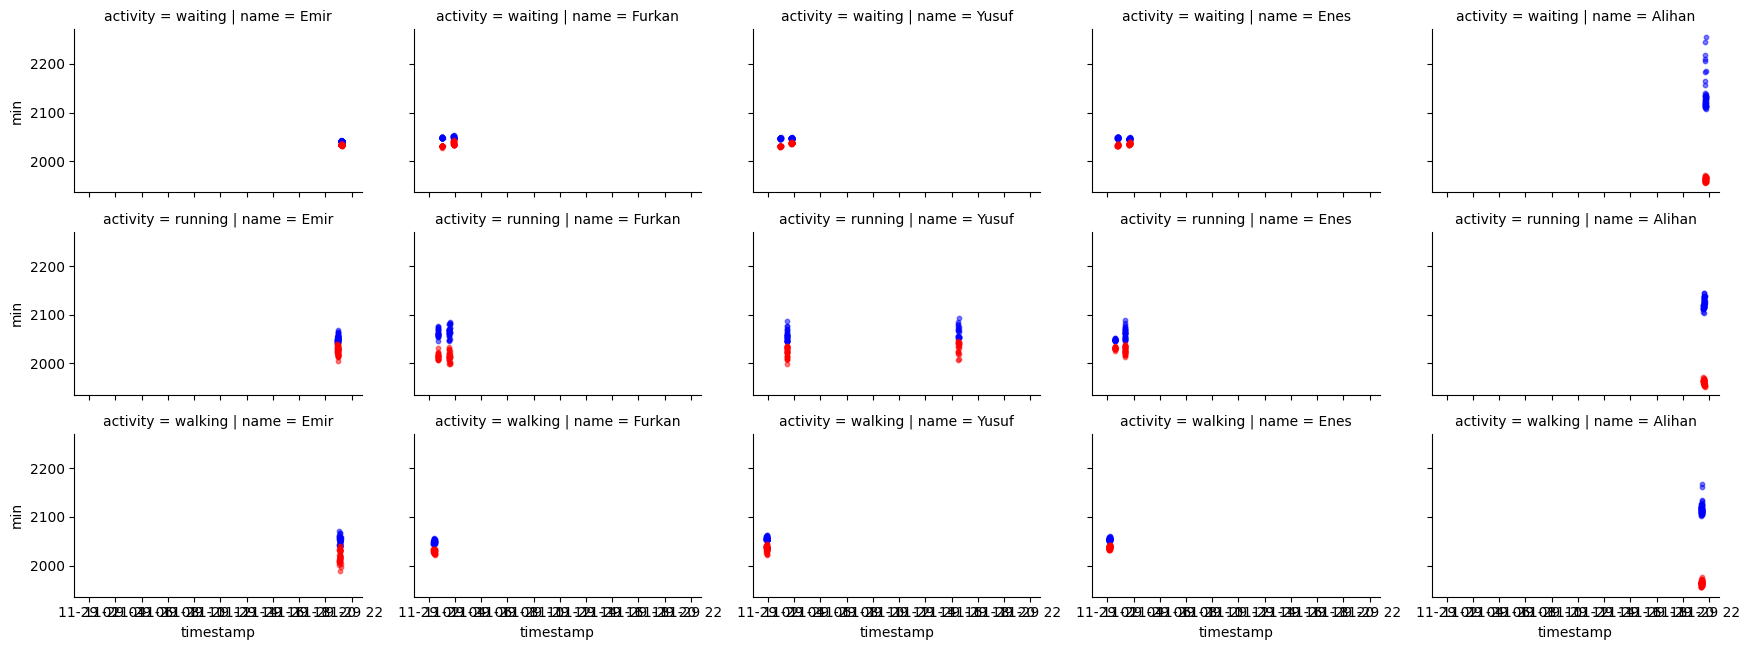

In [72]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
# grid.map(plt.plot('timestamp', max, label='Max Value', color='blue'))
# grid.map(plt.plot('timestamp', min, label='Min Value', color='red'))

# Add titles and labels for clarity
# plt.title('Max and Min Values Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()

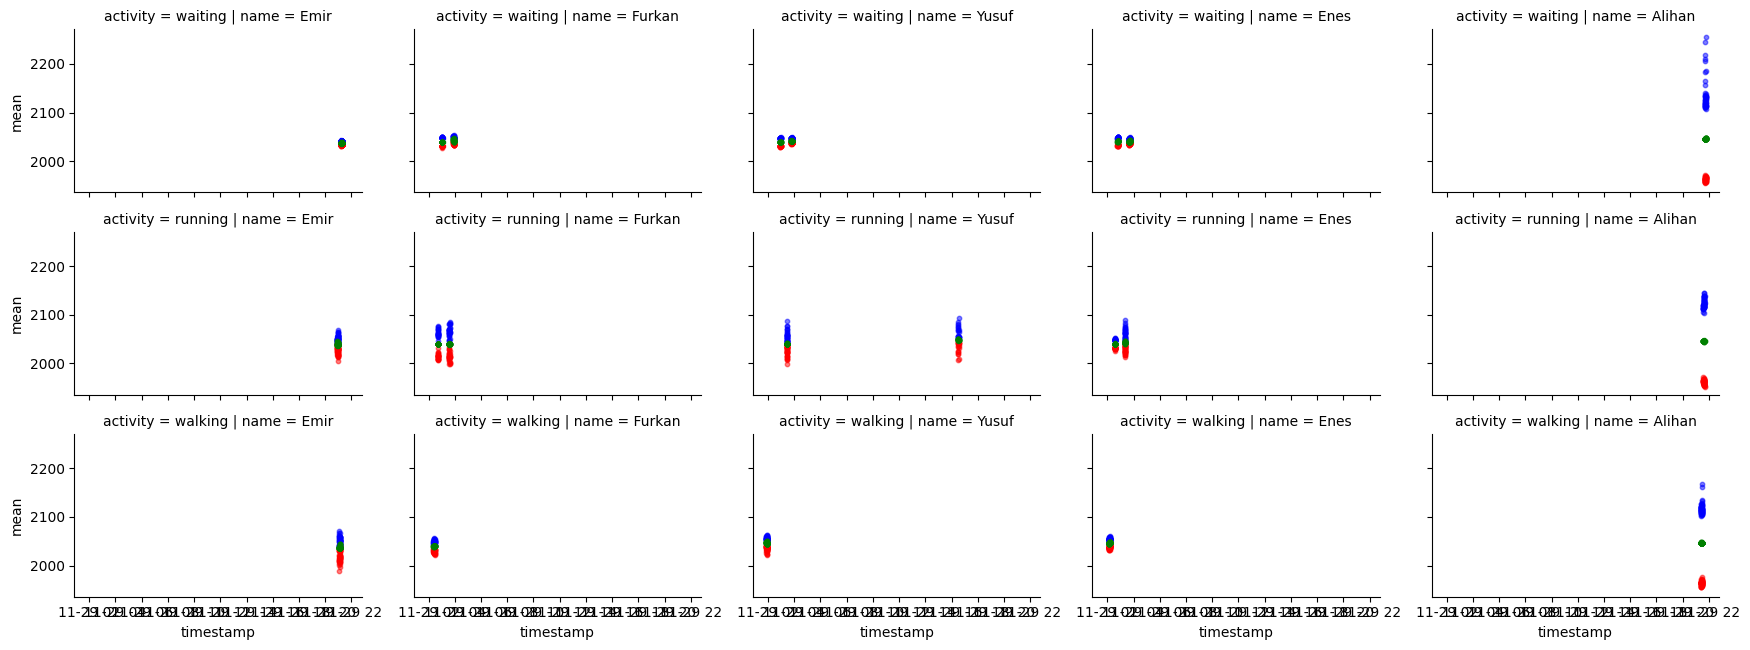

In [73]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

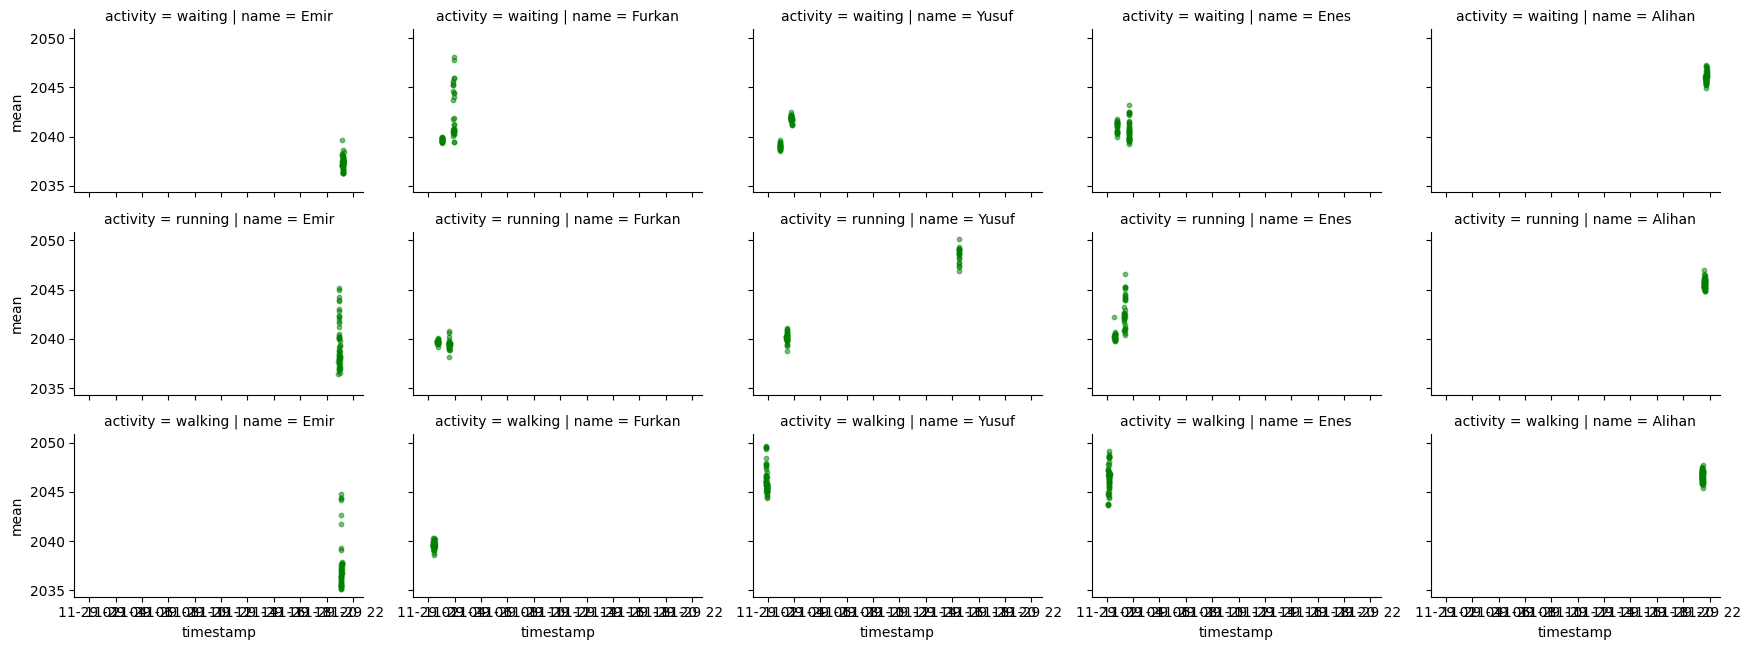

In [74]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

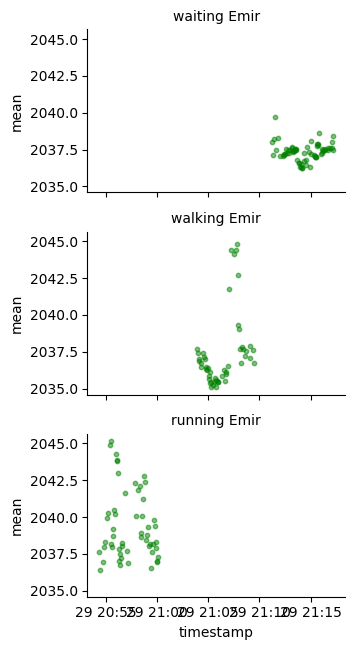

In [75]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train_emir = train[train['name'] == 'Emir']


grid = sns.FacetGrid(train_emir, row='activity', height=2.2, aspect=1.6)


grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

grid.set_titles(row_template='{row_name} Emir')
plt.show() 

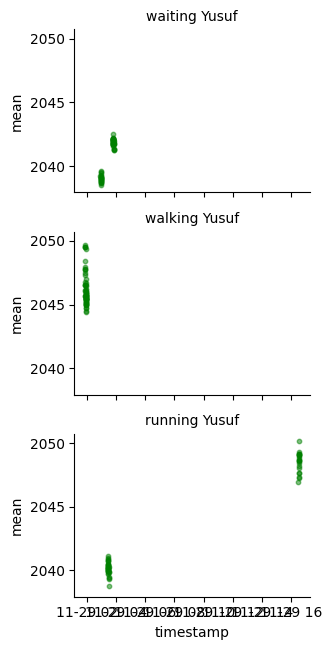

In [76]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train_yusuf = train[train['name'] == 'Yusuf']


grid = sns.FacetGrid(train_yusuf, row='activity', height=2.2, aspect=1.6)

grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

grid.set_titles(row_template='{row_name} Yusuf')
plt.show() # To display the plot, if not in a notebook environment

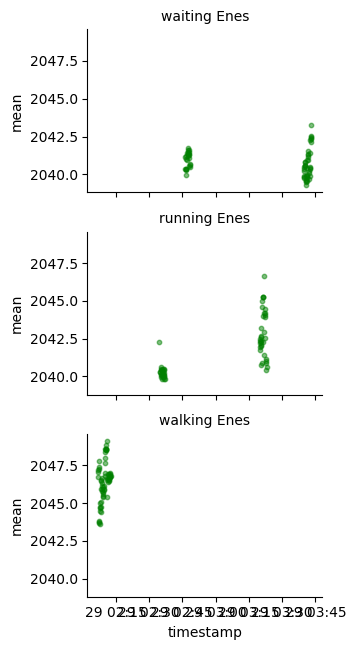

In [77]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

train_enes = train[train['name'] == 'Enes']
grid = sns.FacetGrid(train_enes, row='activity', height=2.2, aspect=1.6)

grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

grid.set_titles(row_template='{row_name} Enes')
plt.show() # To display the plot, if not in a notebook environment

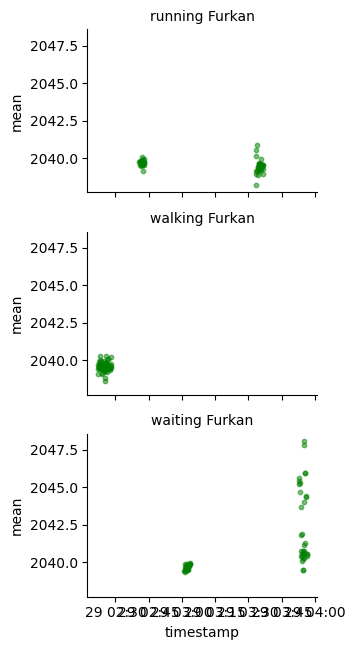

In [78]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train_furkan = train[train['name'] == 'Furkan']
grid = sns.FacetGrid(train_furkan, row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)
grid.set_titles(row_template='{row_name} Furkan')
plt.show()

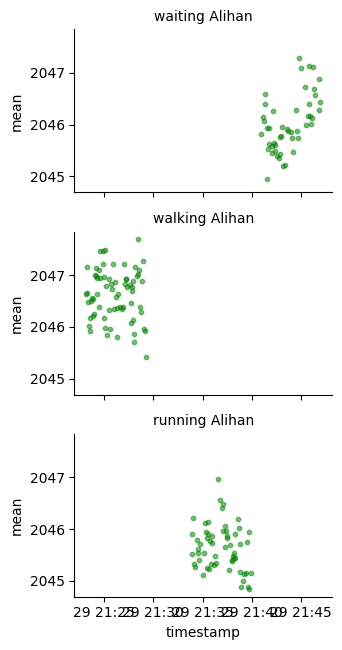

In [79]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train_alihan = train[train['name'] == 'Alihan']
grid = sns.FacetGrid(train_alihan, row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)
grid.set_titles(row_template='{row_name} Alihan')
plt.show()

In [80]:
#Relation between Mean and Movement apply train at later date
train['range'] = train['max'] - train['min']
train['mean_to_range_ratio'] = np.where(
    train['range'] != 0,(train['mean'] - train['min']) / train['range'], 0.5
)
#confirnmation printout
print(train[['mean', 'min', 'max', 'range', 'mean_to_range_ratio']].head())

             mean   min   max  range  mean_to_range_ratio
1710  2037.283333  2033  2041      8             0.535417
874   2039.936000  2007  2075     68             0.484353
1252  2042.155333  2037  2048     11             0.468667
1345  2041.374000  2035  2047     12             0.531167
873   2039.518667  2018  2055     37             0.581586


In [81]:
#Strip Out Useless Info apply to train later
KEEP_COLUMNS = ['max', 'min', 'mean', 'range', 'mean_to_range_ratio', 'activity', 'name']
train_processed = train[KEEP_COLUMNS].copy()
print(train_processed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 1710 to 286
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   max                  900 non-null    int64  
 1   min                  900 non-null    int64  
 2   mean                 900 non-null    float64
 3   range                900 non-null    int64  
 4   mean_to_range_ratio  900 non-null    float64
 5   activity             900 non-null    object 
 6   name                 900 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 56.2+ KB
None


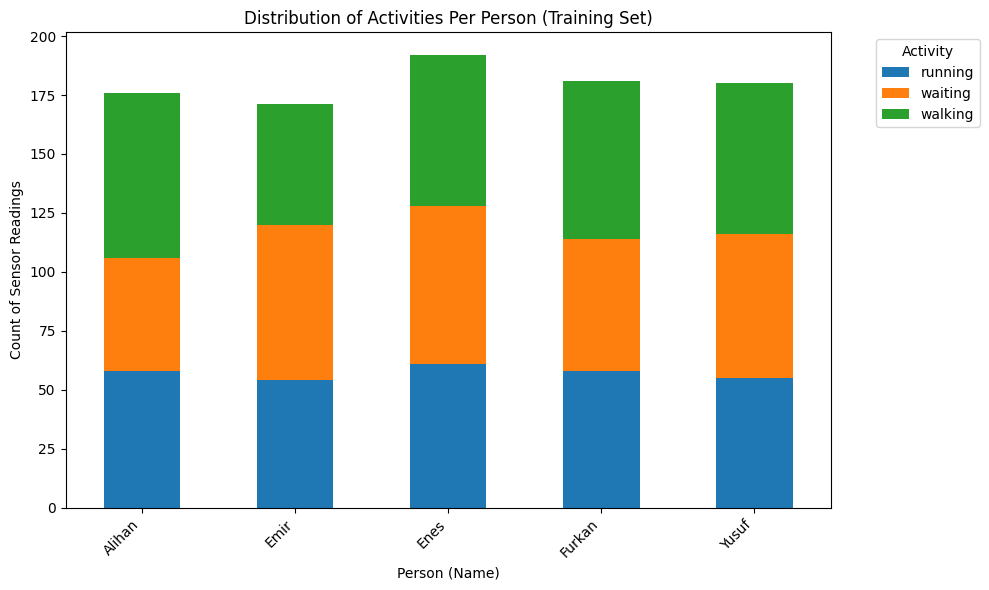

/home/sshar/.local/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


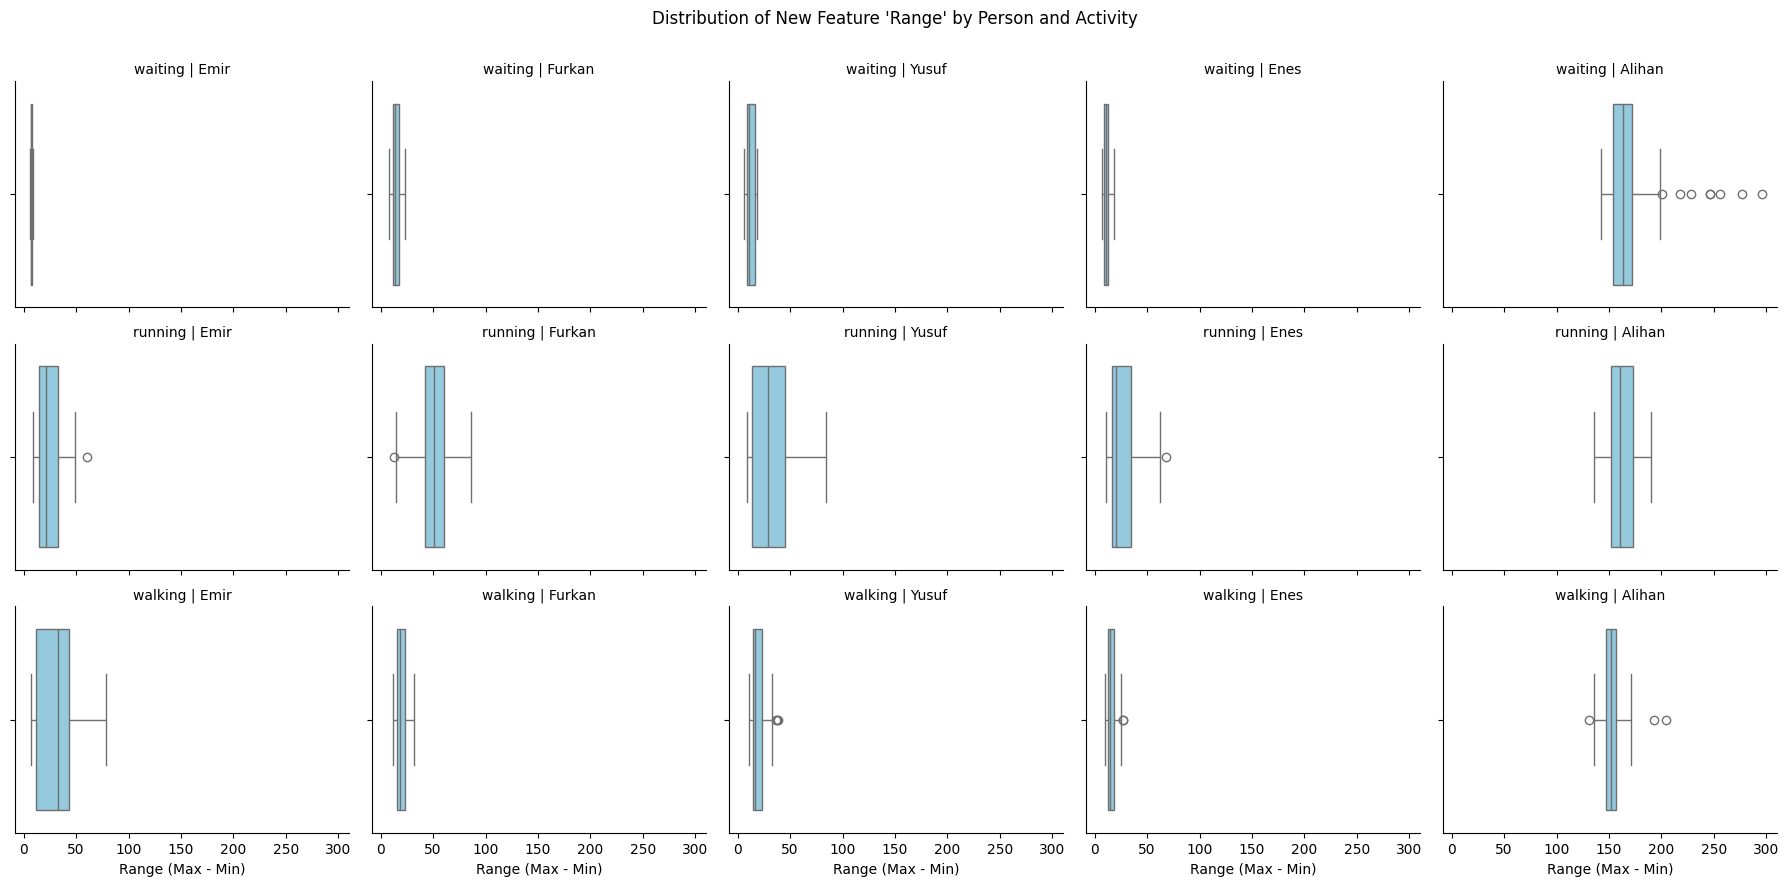

In [82]:
activity_counts = train.groupby('name')['activity'].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
activity_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Activities Per Person (Training Set)')
ax.set_xlabel('Person (Name)')
ax.set_ylabel('Count of Sensor Readings')
ax.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
grid_box = sns.FacetGrid(train, col='name', row='activity', height=3, aspect=1.2)
grid_box.map(sns.boxplot, 'range', orient='h', color='skyblue')
grid_box.set_titles(col_template="{col_name}", row_template="{row_name}")
grid_box.set_axis_labels("Range (Max - Min)", "")
plt.subplots_adjust(top=0.9)
grid_box.figure.suptitle("Distribution of New Feature 'Range' by Person and Activity")
plt.show()

In [83]:
if 'range' not in train.columns:
    train['range'] = train['max'] - train['min']
    train['mean_to_range_ratio'] = np.where(
        train['range'] != 0,
        (train['mean'] - train['min']) / train['range'],
        0.5
    )
test['range'] = test['max'] - test['min']
test['mean_to_range_ratio'] = np.where(
    test['range'] != 0,
    (test['mean'] - test['min']) / test['range'],
    0.5
)

all_train_cols = train.columns.tolist()
metadata_cols = ['activity', 'name', 'timestamp'] 
KEEP_COLUMNS = [col for col in all_train_cols if col not in ['timestamp']]

# Create processed datasets
train_processed = train[KEEP_COLUMNS].copy()
test_processed = test[KEEP_COLUMNS].copy()

In [84]:
X_train = train_processed.drop(['activity', 'name'], axis=1, errors='ignore')
y_train = train_processed['activity']

#Prepare test data 
X_test = test_processed.drop(['activity', 'name'], axis=1, errors='ignore')
y_test = test_processed['activity']
common_features = X_train.columns.intersection(X_test.columns).tolist()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  
y_test_encoded = le.transform(y_test)      


print(f"Original Activities: {le.classes_}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Features used: {list(X_train.columns)}")


Original Activities: ['running' 'waiting' 'walking']
Training set size: 900
Test set size: 900
Number of features: 13
Features used: ['mean', 'top_3_mean', 'min', 'max', 'std_dev', 'median', 'q1', 'q3', 'skewness', 'dominant_freq', 'energy', 'range', 'mean_to_range_ratio']


In [85]:
from sklearn.metrics import accuracy_score, classification_report
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train_encoded)
y_pred_lr = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test_encoded, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_encoded, y_pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.3156

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     running       0.00      0.00      0.00       314
     waiting       0.00      0.00      0.00       302
     walking       0.32      1.00      0.48       284

    accuracy                           0.32       900
   macro avg       0.11      0.33      0.16       900
weighted avg       0.10      0.32      0.15       900



/home/sshar/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sshar/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/sshar/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [86]:
classifiers = {
    "Logistic Regression (One-vs-Rest)": LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (LinearSVC)": LinearSVC(max_iter=10000, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
}

results = []
trained_models = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train_encoded)
    test_score = model.score(X_test, y_test_encoded)
    train_score = model.score(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test_encoded, y_pred)
    
    results.append({
        'Model': name, 
        'Train Accuracy': round(train_score * 100, 2),
        'Test Accuracy': round(test_accuracy * 100, 2),
        'Overfitting Gap': round((train_score - test_accuracy) * 100, 2)
    })
    
    trained_models[name] = model

model_results = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)

print(model_results)

/home/sshar/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


                                Model  Train Accuracy  Test Accuracy  \
3                       Random Forest          100.00          84.00   
2                       Decision Tree          100.00          79.44   
1                 K-Nearest Neighbors           68.22          49.22   
5                Gaussian Naive Bayes           49.33          44.11   
0   Logistic Regression (One-vs-Rest)           35.11          31.56   
4  Support Vector Machine (LinearSVC)           35.11          31.56   

   Overfitting Gap  
3            16.00  
2            20.56  
1            19.00  
5             5.22  
0             3.56  
4             3.56  



ANALYSIS OF BEST MODEL: Random Forest
Test Accuracy: 84.0%


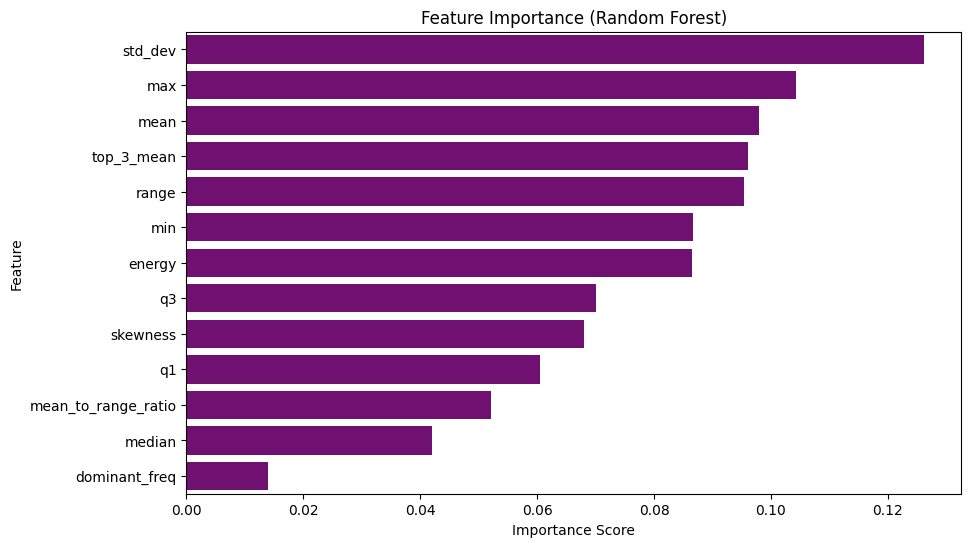

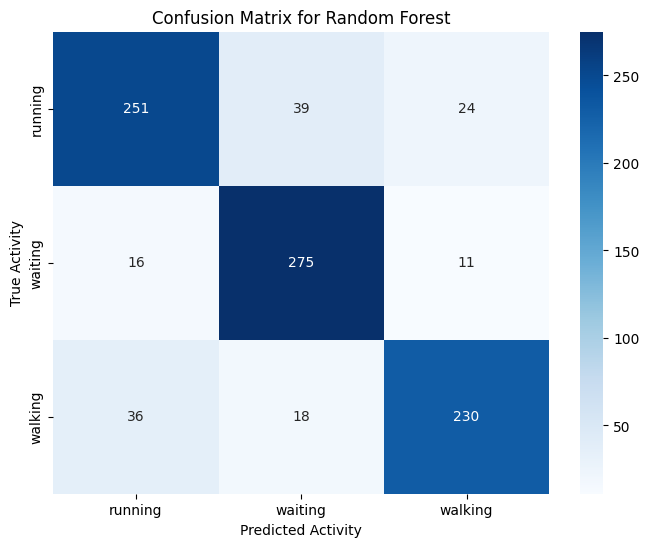


Classification Report (Test Data):
              precision    recall  f1-score   support

     running       0.83      0.80      0.81       314
     waiting       0.83      0.91      0.87       302
     walking       0.87      0.81      0.84       284

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900



In [87]:
from sklearn.metrics import confusion_matrix, classification_report
best_model_name = model_results.iloc[0]['Model']
best_model = trained_models[best_model_name]

print(f"\nANALYSIS OF BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {model_results.iloc[0]['Test Accuracy']}%")

#feature importance
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index, color='purple')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.show()

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


Random Forest (Custom Feature Set) Accuracy: 0.8367
Features used: ['dominant_freq', 'energy', 'std_dev', 'skewness', 'min', 'max']

Random Forest (Custom Feature Set) Classification Report:
              precision    recall  f1-score   support

     running       0.83      0.82      0.82       314
     waiting       0.83      0.87      0.85       302
     walking       0.85      0.82      0.83       284

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900



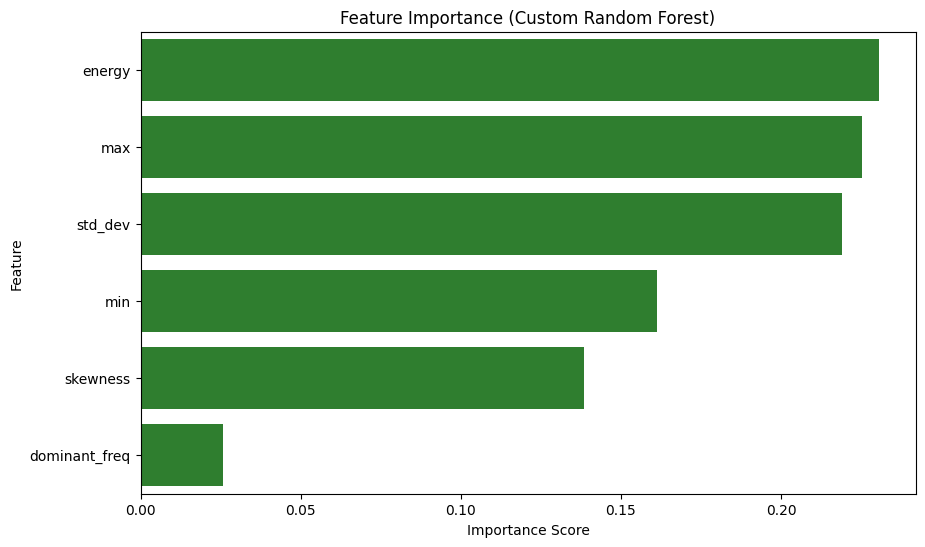


Final Comparison:
                             Model  Accuracy  Accuracy %
    Logistic Regression (Baseline)    0.3156       31.56
      Random Forest (All Features)    0.8400       84.00
Random Forest (Custom Features: 6)    0.8367       83.67

Baseline: 0.3156
Best Model (Random Forest): 0.8400
Custom RF: 0.8367
Improvement over baseline: +52.11pp
Difference from best model: -0.33pp


In [88]:
rf_feature_cols_new = ['dominant_freq', 'energy', 'std_dev', 'skewness', 'min', 'max']

available_features = [f for f in rf_feature_cols_new if f in X_train.columns]
missing_features = [f for f in rf_feature_cols_new if f not in X_train.columns]

if len(rf_feature_cols_new) > 0:
    #new feature subset
    X_train_rf_new = X_train[rf_feature_cols_new]
    X_test_rf_new = X_test[rf_feature_cols_new]
    rf_model_new = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_new.fit(X_train_rf_new, y_train_encoded)
    y_pred_rf_new = rf_model_new.predict(X_test_rf_new)
    
    rf_new_accuracy = accuracy_score(y_test_encoded, y_pred_rf_new)
    print(f"\nRandom Forest (Custom Feature Set) Accuracy: {rf_new_accuracy:.4f}")
    print(f"Features used: {rf_feature_cols_new}")
    print("\nRandom Forest (Custom Feature Set) Classification Report:")
    print(classification_report(y_test_encoded, y_pred_rf_new, target_names=le.classes_))
    
    rf_new_importances = pd.Series(rf_model_new.feature_importances_, 
                                    index=rf_feature_cols_new).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rf_new_importances.values, y=rf_new_importances.index, color='forestgreen')
    plt.title('Feature Importance (Custom Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()
    
    # Final comparison
    lr_baseline_accuracy = lr_accuracy
    best_comparison_accuracy = model_results.iloc[0]['Test Accuracy'] / 100
    
    comparison_summary = pd.DataFrame({
        'Model': [
            'Logistic Regression (Baseline)',
            f'{best_model_name} (All Features)',
            f'Random Forest (Custom Features: {len(rf_feature_cols_new)})'
        ],
        'Accuracy': [
            round(lr_baseline_accuracy, 4),
            round(best_comparison_accuracy, 4),
            round(rf_new_accuracy, 4)
        ],
        'Accuracy %': [
            round(lr_baseline_accuracy * 100, 2),
            round(best_comparison_accuracy * 100, 2),
            round(rf_new_accuracy * 100, 2)
        ]
    })
    
    print("\nFinal Comparison:")
    print(comparison_summary.to_string(index=False))
    
    improvement_over_baseline = (rf_new_accuracy - lr_baseline_accuracy) * 100
    improvement_over_best = (rf_new_accuracy - best_comparison_accuracy) * 100
    
    print(f"\nBaseline: {lr_baseline_accuracy:.4f}")
    print(f"Best Model ({best_model_name}): {best_comparison_accuracy:.4f}")
    print(f"Custom RF: {rf_new_accuracy:.4f}")
    print(f"Improvement over baseline: {improvement_over_baseline:+.2f}pp")
    
    if rf_new_accuracy > best_comparison_accuracy:
        print(f"Improvement over best model: {improvement_over_best:+.2f}pp")
    else:
        print(f"Difference from best model: {improvement_over_best:.2f}pp")
else:
    print(f"\nERROR: No specified features available. Available: {list(X_train.columns)}")


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier

#feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train_encoded)
print(f"Best RF parameters: {rf_grid.best_params_}")
print(f"Best RF CV score: {rf_grid.best_score_:.4f}")

rf_tuned_accuracy = rf_grid.score(X_test, y_test_encoded)
print(f"Tuned RF Test Accuracy: {rf_tuned_accuracy:.4f}")

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train_encoded)
gb_accuracy = gb_model.score(X_test, y_test_encoded)
print(f"Gradient Boosting Test Accuracy: {gb_accuracy:.4f}")

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('gb', gb_model),
        ('lr', LogisticRegression(max_iter=1000, random_state=42))
    ],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train_encoded)
voting_accuracy = voting_clf.score(X_test_scaled, y_test_encoded)
print(f"Voting Ensemble Test Accuracy: {voting_accuracy:.4f}")

# Xboost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train_encoded)
xgb_accuracy = xgb_model.score(X_test, y_test_encoded)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

optimization_results = pd.DataFrame({
    'Method': [
        'Baseline (Logistic Regression)',
        f'Best Original Model ({best_model_name})',
        'Tuned Random Forest',
        'Gradient Boosting',
        'Voting Ensemble',
        'XGBoost' if xgb_accuracy else 'XGBoost (N/A)'
    ],
    'Test Accuracy': [
        round(lr_accuracy, 4),
        round(best_comparison_accuracy, 4),
        round(rf_tuned_accuracy, 4),
        round(gb_accuracy, 4),
        round(voting_accuracy, 4),
        round(xgb_accuracy, 4) if xgb_accuracy else 0
    ]
}).sort_values(by='Test Accuracy', ascending=False)

print("Optimization Results:")
print(optimization_results.to_string(index=False))

best_optimization = optimization_results.iloc[0]
print(f"\nBest Method: {best_optimization['Method']}")
print(f"Best Accuracy: {best_optimization['Test Accuracy']:.4f}")
print(f"Improvement over baseline: {(best_optimization['Test Accuracy'] - lr_accuracy)*100:+.2f}pp")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best RF CV score: 0.8522
Tuned RF Test Accuracy: 0.8433
Best RF parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best RF CV score: 0.8522
Tuned RF Test Accuracy: 0.8433
Gradient Boosting Test Accuracy: 0.8389
Gradient Boosting Test Accuracy: 0.8389
Voting Ensemble Test Accuracy: 0.8433
Voting Ensemble Test Accuracy: 0.8433
XGBoost Test Accuracy: 0.8467
Optimization Results:
                             Method  Test Accuracy
                            XGBoost         0.8467
                Tuned Random Forest         0.8433
                    Voting Ensemble         0.8433
Best Original Model (Random Forest)         0.8400
                  Gradient Boosting         0.8389
     Baseline (Logistic Regression)         0.3156

Best Method: XGBoost
Best Accuracy: 0.8467
Im

In [90]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression as LogReg_Meta

# Define base learner (Random Forest)
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Define meta-learner (Linear Regression approach using Logistic Regression for classification)
lr_meta = LogReg_Meta(max_iter=1000, random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_base)],
    final_estimator=lr_meta,
    cv=5
)

# Train stacking classifier
stacking_clf.fit(X_train_scaled, y_train_encoded)
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test_encoded, stacking_pred)

print(f"Random Forest + Linear Regression (Stacking) Test Accuracy: {stacking_accuracy:.4f}")
print(f"Improvement over tuned RF: {(stacking_accuracy - rf_tuned_accuracy)*100:+.2f}pp")

# Alternative: Residual Learning Approach
# Train RF and capture predictions
rf_train_pred = rf_grid.best_estimator_.predict_proba(X_train_scaled)
rf_test_pred = rf_grid.best_estimator_.predict_proba(X_test_scaled)

# Train linear regression on RF predictions to refine them
lr_residual = LogReg_Meta(max_iter=1000, random_state=42)
lr_residual.fit(rf_train_pred, y_train_encoded)
residual_pred = lr_residual.predict(rf_test_pred)
residual_accuracy = accuracy_score(y_test_encoded, residual_pred)

print(f"\nRandom Forest + Linear Regression (Residual Refinement) Test Accuracy: {residual_accuracy:.4f}")
print(f"Improvement over tuned RF: {(residual_accuracy - rf_tuned_accuracy)*100:+.2f}pp")

# Compare all methods including stacking
enhanced_results = pd.DataFrame({
    'Method': [
        'Tuned Random Forest (Baseline)',
        'RF + LR Stacking',
        'RF + LR Residual Refinement'
    ],
    'Test Accuracy': [
        round(rf_tuned_accuracy, 4),
        round(stacking_accuracy, 4),
        round(residual_accuracy, 4)
    ]
}).sort_values(by='Test Accuracy', ascending=False)

print(enhanced_results.to_string(index=False))

Random Forest + Linear Regression (Stacking) Test Accuracy: 0.8433
Improvement over tuned RF: +0.00pp

Random Forest + Linear Regression (Residual Refinement) Test Accuracy: 0.3678
Improvement over tuned RF: -47.56pp
                        Method  Test Accuracy
Tuned Random Forest (Baseline)         0.8433
              RF + LR Stacking         0.8433
   RF + LR Residual Refinement         0.3678


/home/sshar/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sshar/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [91]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline

rfe_selector = RFE(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=5,
    step=1
)
X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train_encoded)
X_test_rfe = rfe_selector.transform(X_test_scaled)

selected_features = X_train.columns[rfe_selector.support_].tolist()
print(f"Selected Features (RFE): {selected_features}")

# Train RF with selected features
rf_rfe = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_rfe.fit(X_train_rfe, y_train_encoded)
rf_rfe_accuracy = rf_rfe.score(X_test_rfe, y_test_encoded)
print(f"RF with RFE Features Accuracy: {rf_rfe_accuracy:.4f}")

et_model = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train_scaled, y_train_encoded)
et_accuracy = et_model.score(X_test_scaled, y_test_encoded)
print(f"Extra Trees Test Accuracy: {et_accuracy:.4f}")

adaboost_rf = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost_rf.fit(X_train_scaled, y_train_encoded)
adaboost_accuracy = adaboost_rf.score(X_test_scaled, y_test_encoded)
print(f"AdaBoost + RF Test Accuracy: {adaboost_accuracy:.4f}")

from sklearn.svm import SVC

advanced_stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)),
        ('et', ExtraTreesClassifier(n_estimators=150, max_depth=15, random_state=42)),
        ('svc', SVC(kernel='rbf', probability=True, random_state=42))
    ],
    final_estimator=LogReg_Meta(max_iter=1000, random_state=42),
    cv=5
)
advanced_stacking_clf.fit(X_train_scaled, y_train_encoded)
advanced_stacking_accuracy = advanced_stacking_clf.score(X_test_scaled, y_test_encoded)
print(f"Advanced Stacking (RF + ET + SVC) Test Accuracy: {advanced_stacking_accuracy:.4f}")

comprehensive_results = pd.DataFrame({
    'Enhancement Method': [
        'Baseline Tuned RF',
        'RF + LR Stacking',
        'RF + LR Residual',
        'RF with RFE Features',
        'Extra Trees Classifier',
        'AdaBoost + RF',
        'Advanced Stacking (RF+ET+SVC)'
    ],
    'Test Accuracy': [
        round(rf_tuned_accuracy, 4),
        round(stacking_accuracy, 4),
        round(residual_accuracy, 4),
        round(rf_rfe_accuracy, 4),
        round(et_accuracy, 4),
        round(adaboost_accuracy, 4),
        round(advanced_stacking_accuracy, 4)
    ],
    'Improvement vs Baseline': [
        0,
        round((stacking_accuracy - rf_tuned_accuracy)*100, 2),
        round((residual_accuracy - rf_tuned_accuracy)*100, 2),
        round((rf_rfe_accuracy - rf_tuned_accuracy)*100, 2),
        round((et_accuracy - rf_tuned_accuracy)*100, 2),
        round((adaboost_accuracy - rf_tuned_accuracy)*100, 2),
        round((advanced_stacking_accuracy - rf_tuned_accuracy)*100, 2)
    ]
}).sort_values(by='Test Accuracy', ascending=False)

print(comprehensive_results.to_string(index=False))

best_enhanced_method = comprehensive_results.iloc[0]
print(f"BEST ENHANCED METHOD: {best_enhanced_method['Enhancement Method']}")
print(f"Test Accuracy: {best_enhanced_method['Test Accuracy']:.4f}")
print(f"Improvement vs Baseline: {best_enhanced_method['Improvement vs Baseline']:+.2f}%")

Selected Features (RFE): ['mean', 'top_3_mean', 'std_dev', 'energy', 'range']
RF with RFE Features Accuracy: 0.8178
RF with RFE Features Accuracy: 0.8178
Extra Trees Test Accuracy: 0.8344
Extra Trees Test Accuracy: 0.8344
AdaBoost + RF Test Accuracy: 0.8444
AdaBoost + RF Test Accuracy: 0.8444
Advanced Stacking (RF + ET + SVC) Test Accuracy: 0.8467
           Enhancement Method  Test Accuracy  Improvement vs Baseline
Advanced Stacking (RF+ET+SVC)         0.8467                     0.33
                AdaBoost + RF         0.8444                     0.11
            Baseline Tuned RF         0.8433                     0.00
             RF + LR Stacking         0.8433                     0.00
       Extra Trees Classifier         0.8344                    -0.89
         RF with RFE Features         0.8178                    -2.56
             RF + LR Residual         0.3678                   -47.56
BEST ENHANCED METHOD: Advanced Stacking (RF+ET+SVC)
Test Accuracy: 0.8467
Improvement vs B